In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
random.seed(0) 
np.random.seed(0)
V = 4039
T = 1000*V
InitNode = 0

In [3]:
nodes = list(range(V)) # Get a list of only the node names
edges = np.loadtxt('facebook_combined.txt',dtype=int)

In [4]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


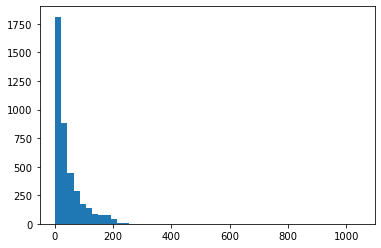

In [5]:
print(nx.info(G))
z = list(G.degree([n for n in G]))
y = [y[1] for y in z]
b = np.linspace(0,max(y))
plt.hist(y,bins=b)
plt.show()

In [6]:
nx.set_edge_attributes(G, 0,'visits')
H = G.to_directed()
nx.set_node_attributes(G, 0,'visits')

In [7]:
pi = np.array([x[1] for x in list(G.degree())])
pi = pi/np.sum(pi)

In [8]:
t = 0
v = InitNode
freq = np.empty(V)
err = []
ferr = []

while t < T:
    v_next = random.choice(list(H.adj[v]))
    H[v][v_next]['visits'] += 1
    G.nodes[v_next]['visits'] += 1
    t += 1
    v = v_next
    if t%(V//10) == 0:
        for i in range(V):
            freq[i] = G.nodes[i]['visits']
        pi_hat = freq/np.sum(freq)
        err.append(np.mean(abs(pi-pi_hat)))
        ferr.append(np.mean(abs(pi-pi_hat)/pi))

In [14]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.set_edge_attributes(G, 0,'visits')
H = G.to_directed()
nx.set_node_attributes(G, 0,'visits')
Gf = G.copy()

In [15]:
t = 0
v = InitNode
freq1 = np.empty(V)
freq2 = np.empty(V)
err1 = []
err2 = []
ferr1 = []
ferr2 = []
explore = np.arange(1,T,T//(100*np.log(T)))

while t < T:
    if t in explore:
        v_next = np.random.randint(0,V)
    else:
        v_next = random.choice(list(H.adj[v]))
        G.nodes[v_next]['visits'] += 1
        H[v][v_next]['visits'] += 1
    Gf.nodes[v_next]['visits'] += 1
    t += 1
    v = v_next
    if t%(V//10) == 0:
        for i in range(V):
            freq1[i] = G.nodes[i]['visits']
            freq2[i] = G.nodes[i]['visits']
        pi_hat1 = freq1/np.sum(freq1)
        pi_hat2 = freq2/np.sum(freq2)
        err1.append(np.mean(abs(pi-pi_hat1)))
        ferr1.append(np.mean(abs(pi-pi_hat1)/pi))
        err2.append(np.mean(abs(pi-pi_hat2)))
        ferr2.append(np.mean(abs(pi-pi_hat2)/pi))

In [16]:
for i in range(V):
    if G.nodes[i] != Gf.nodes[i]:
        print(G.nodes[i],Gf.nodes[i])

{'visits': 7992} {'visits': 7994}
{'visits': 426} {'visits': 428}
{'visits': 421} {'visits': 423}
{'visits': 23} {'visits': 24}
{'visits': 1516} {'visits': 1517}
{'visits': 340} {'visits': 341}
{'visits': 1609} {'visits': 1610}
{'visits': 1543} {'visits': 1544}
{'visits': 316} {'visits': 317}
{'visits': 129} {'visits': 130}
{'visits': 158} {'visits': 159}
{'visits': 622} {'visits': 623}
{'visits': 132} {'visits': 133}
{'visits': 1781} {'visits': 1782}
{'visits': 26} {'visits': 27}
{'visits': 211} {'visits': 212}
{'visits': 254} {'visits': 255}
{'visits': 149} {'visits': 150}
{'visits': 306} {'visits': 307}
{'visits': 154} {'visits': 155}
{'visits': 41} {'visits': 42}
{'visits': 212} {'visits': 213}
{'visits': 146} {'visits': 147}
{'visits': 507} {'visits': 508}
{'visits': 147} {'visits': 148}
{'visits': 296} {'visits': 298}
{'visits': 214} {'visits': 217}
{'visits': 387} {'visits': 388}
{'visits': 353} {'visits': 354}
{'visits': 142} {'visits': 143}
{'visits': 279} {'visits': 280}
{'vi

{'visits': 553} {'visits': 555}
{'visits': 734} {'visits': 735}
{'visits': 436} {'visits': 437}
{'visits': 293} {'visits': 294}
{'visits': 998} {'visits': 1000}
{'visits': 371} {'visits': 372}
{'visits': 254} {'visits': 255}
{'visits': 1143} {'visits': 1145}
{'visits': 368} {'visits': 369}
{'visits': 1239} {'visits': 1240}
{'visits': 997} {'visits': 998}
{'visits': 342} {'visits': 343}
{'visits': 162} {'visits': 163}
{'visits': 969} {'visits': 970}
{'visits': 1343} {'visits': 1345}
{'visits': 613} {'visits': 614}
{'visits': 1345} {'visits': 1346}
{'visits': 2008} {'visits': 2009}
{'visits': 23} {'visits': 24}
{'visits': 1492} {'visits': 1493}
{'visits': 638} {'visits': 639}
{'visits': 334} {'visits': 335}
{'visits': 318} {'visits': 319}
{'visits': 323} {'visits': 324}
{'visits': 2100} {'visits': 2102}
{'visits': 735} {'visits': 736}
{'visits': 36} {'visits': 37}
{'visits': 214} {'visits': 215}
{'visits': 113} {'visits': 114}
{'visits': 1070} {'visits': 1071}
{'visits': 607} {'visits': 

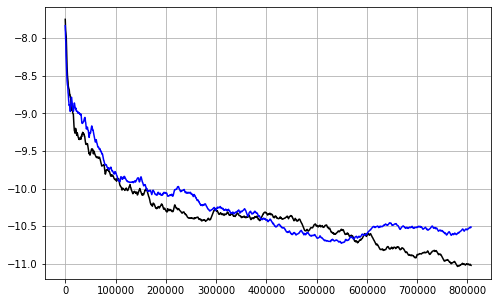

In [21]:
plt.figure(2,figsize=(8,5)) 
plt.plot(np.array(list(range(len(err)//5)))*(V//10),np.log(err[:len(err)//5]),color='black')
plt.plot(np.array(list(range(len(err)//5)))*(V//10),np.log(err1[:len(err)//5]),color='blue')
plt.grid()

In [35]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.set_edge_attributes(G, 0,'visits')
H = G.to_directed()
nx.set_node_attributes(G, 0,'visits')
Gf = G.copy()

In [36]:
t = 0
v = InitNode
freq3 = np.empty(V)
err3 = []

h_len = 100
threshold = 10
history = [None]*h_len
pointer = 0

while t < T:
    temp = max(history,key=history.count)
    if  temp != None and history.count(temp) > threshold:
        v_next = np.random.randint(0,V)
        print('Improvising')
    else:
        v_next = random.choice(list(H.adj[v]))
    G.nodes[v_next]['visits'] += 1
    t += 1
    history[pointer] = v
    v = v_next
    pointer = (pointer + 1) % h_len
    
    if t%(V//10) == 0:
        for i in range(V):
            freq3[i] = G.nodes[i]['visits']
        pi_hat3 = freq3/np.sum(freq3)
        err3.append(np.mean(abs(pi-pi_hat3)))

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Improvising
Impr

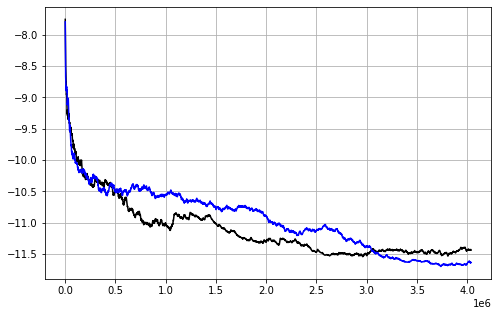

In [38]:
plt.figure(2,figsize=(8,5)) 
plt.plot(np.array(list(range(len(err))))*(V//10),np.log(err),color='black')
plt.plot(np.array(list(range(len(err))))*(V//10),np.log(err3),color='blue')
plt.grid()